# The Tour de France - A Historical Guide


The Tour de France is an annual bicycle race in France that takes place over 21 stages covering over 3,500km on the roads of France. As the biggest event in professional cycling, it is a gruelling race that incorporates both the mountains of the Alps and the Pyrenees and is regarded as an acheivement to complete race suffering neither injury nor disqualification, although suffering in general is regarded as a given.  It is a race steeped in history, controversy and legend. 

The purpose of this notebook is to examine historical Tour de France data and then to synthesise data based on same. The dataset we have chosen to work with gives details of each race since it's inception in 1903.  Included in the dataset is the number of stages, the number of starters and finishers, the distance and the pace, age, name and nationality of the winner.

In [1]:
# import libraries
import pandas as pd # import pandas library
import numpy as np # import numpy library
import matplotlib as mp # import matplotlib library
import seaborn as sns # import seaborn library for visual display


In [2]:
# import the dataset from URL
df = pd.read_csv('https://raw.githubusercontent.com/Kennymctigue/PDA2018Project/master/2018_historical_guide.csv', delimiter=',')

In [5]:
df

,Year,Stages,Started,Ended,Distance,Hour,Minutes,Seconds,Pace,Winner,Country,Age
0,1903,6,60,21,2428,94,33,0,25.679,M. Garin,Fra,32
1,1904,6,88,27,2428,96,5,56,25.265,H. Cornet,Fra,20
2,1905,11,60,24,2994,110,26,58,27.107,L. Trousselier,Fra,24
3,1906,13,82,14,4637,189,34,0,24.463,R. Pottier,Fra,27
4,1907,14,93,33,4488,158,45,5,28.470,L. Petit-Breton,Fra,24
5,1908,14,112,36,4488,156,53,29,28.740,L. Petit-Breton,Fra,25
6,1909,14,150,55,4497,157,1,22,28.658,F. Faber,Lux,22
7,1910,15,110,41,4734,162,41,30,29.099,O. Lapize,Fra,21
8,1911,15,84,28,5343,195,37,0,27.322,G. Garrigou,Fra,27
9,1912,15,131,41,5289,190,30,28,27.763,O. Defraye,Bel,24


### Plotting select items from the dataset

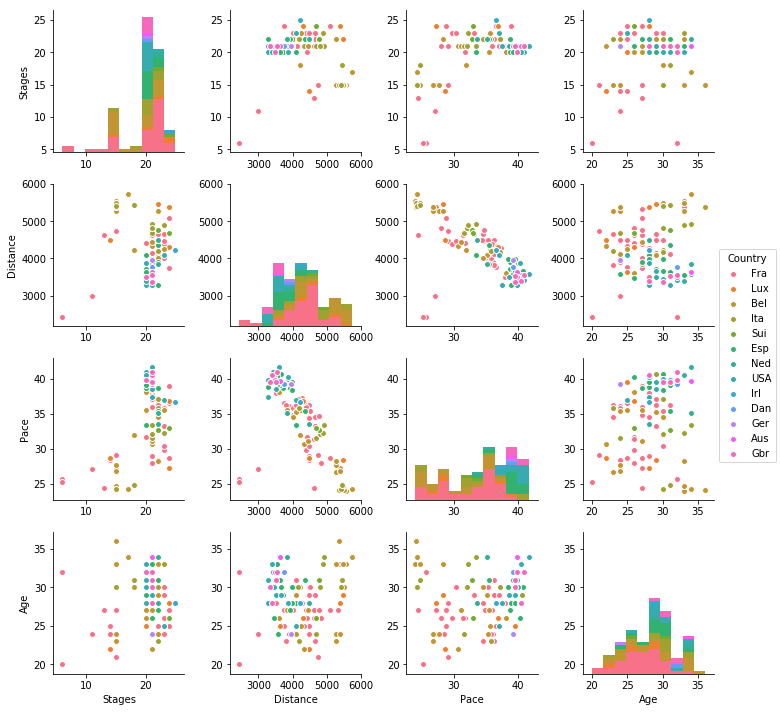

In [9]:
%matplotlib inline
sns.pairplot(df, vars=['Stages', 'Distance', 'Pace', 'Age'],hue='Country')

### Initial Analysis from the Plot

#### Country
The nationality of the winner is quite spread out.  It does not appear to be in any way influenced by the other variables and vice versa, in that we cannot claim that one country is more dominant in faster races or has younger winners.  Each of the countries that have produced numerous winners are featured across the spectrum.  This would lead us to conclude that nationality is not influential on the outcomes of the other variables.

#### Age
As with nationality, age does not appear to heavily influence the other variables as the full array of ages feature across fast races and slow races, long races and relatively short races. We can see from the histogram that the the most common age for a winner is around 28 years old, which is in keeping with expectations as professional cyclists tend to reach their peak performace levels in their late 20's and it would be quite unusual for a cyclist in their early  20's to have acheived the conditioning required to win one of the grand tours.

#### Distance and Pace
There does appear to be some correllation between distance and pace.  It would stand to reason that a longer race would be slower as the riders would have to pace themselves accordingly but the other factor to be accounted for in this area is that the Tour de France has gotten shorter over the years, although has levelled over the past 30 years, and as training and equipment have improved, as with all sports, the times have gotten faster.  We will investigate this further below as this relationship will have an influence on the sythesised data later.

In [17]:
df.describe()

,Year,Stages,Started,Ended,Distance,Hour,Minutes,Seconds,Pace,Age
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,1962.817308,20.076923,142.326923,88.355769,4232.250000,129.115385,29.096154,27.788462,34.128769,28.182692
std,33.599516,3.468841,40.687166,45.758318,697.503743,41.835626,17.288820,17.327610,5.214692,3.358121
min,1903.000000,6.000000,60.000000,11.000000,2428.000000,82.000000,0.000000,0.000000,24.056000,20.000000
25%,1932.750000,20.000000,118.250000,49.000000,3661.250000,94.750000,14.500000,14.000000,29.638250,26.000000
50%,1965.500000,21.000000,132.000000,81.500000,4180.500000,116.000000,30.000000,27.000000,35.419000,28.000000
75%,1991.250000,22.000000,182.000000,132.750000,4659.250000,148.000000,44.000000,42.000000,38.787500,30.000000
max,2017.000000,25.000000,210.000000,174.000000,5745.000000,238.000000,59.000000,59.000000,41.654000,36.000000
